In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import Quadratics
import math

There is potential to use this algorithm to approximate the loss landscape of a neural network and traverse it directly. This is still a work in progress-- the interpolation algorithm is already complete. 

Create our data set to interpolate. 

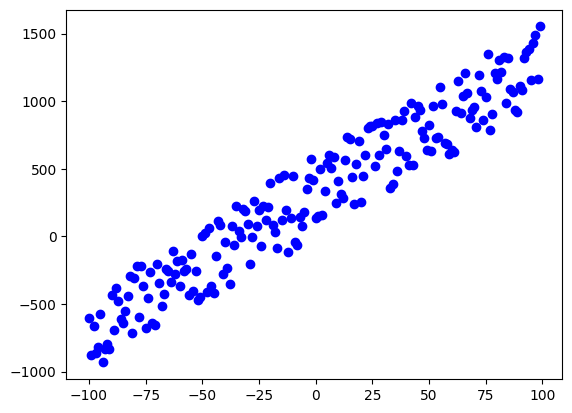

In [2]:
n = 100

inputs = np.arange(-n, n)
np.random.shuffle(inputs)
outputs = (10 * inputs) + (6 * n * np.random.rand(2*n)) #+ (2 * np.pow(inputs, 2) / -n) 
plt.plot(inputs, outputs, 'bo')


Apply linear regression through standard algorithms. 

Defines a weight parameter and a bias parameter. 



In [3]:
train_inputs = inputs[0:190]
train_outputs = outputs[0:190]

weight = 0
bias = 0
alpha = 0.00005

biases = []
weights = []

numEpochs = 200
for i in range(numEpochs):
    biases.append(bias)
    weights.append(weight)

    prediction = weight * train_inputs + bias

    loss = np.sum(np.pow(train_outputs - prediction, 2)) / len(prediction)

    dw = -2 * np.dot(train_outputs - prediction, train_inputs) / len(prediction)
    db = -2 * np.sum(train_outputs - prediction) / len(prediction)

    weight = weight - alpha * dw
    bias = bias - 1000 * alpha * db



40688.109474665966
slope: 10.180980606268605
b: 317.0467484196222


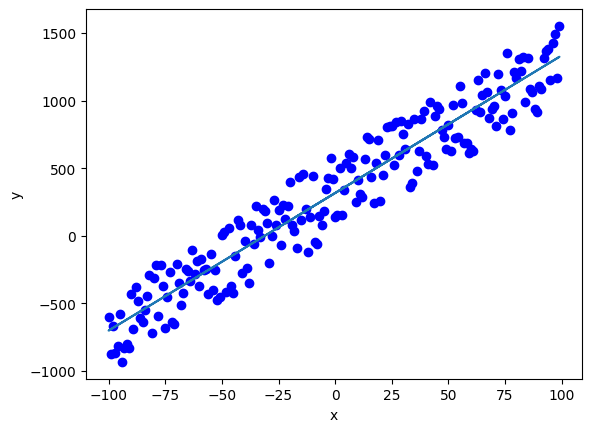

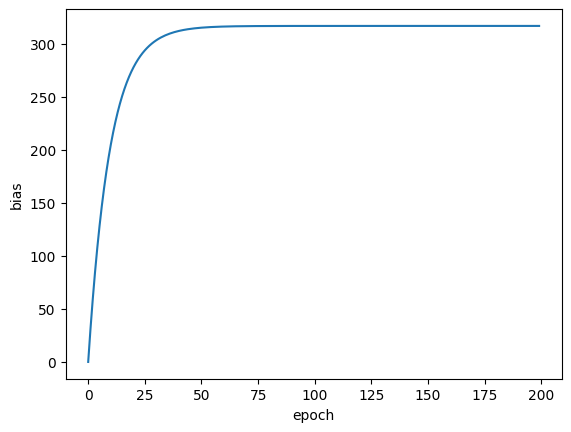

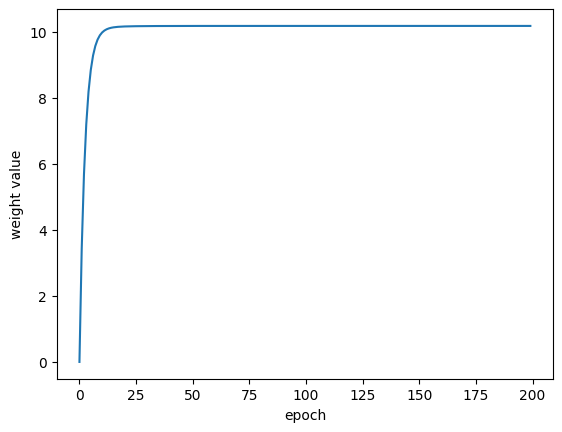

In [4]:
test_inputs = inputs[190:201]
test_outputs = outputs[190:201]

prediction = weight * test_inputs + bias

loss = np.sum(np.pow(test_outputs - prediction, 2)) / len(prediction)
print(loss)

plt.figure(0)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(inputs, outputs, 'bo', inputs, weight * inputs + bias, '-')

plt.figure(1)
plt.xlabel('epoch')
plt.ylabel('bias')
plt.plot(range(numEpochs), biases)

plt.figure(2)
plt.xlabel('epoch')
plt.ylabel('weight value')
plt.plot(range(numEpochs), weights)

print('slope: ' + str(weight))
print('b: ' + str(bias))

In [ ]:
train_inputs = inputs[0:190]
train_outputs = outputs[0:190]

numEpochs = 9 
matrix = np.zeros((numEpochs, 3))


for i in range(numEpochs):
    weight = (random.random() - 0.5) * 200
    bias = (random.random() - 0.5) * 200

    prediction = weight * train_inputs + bias #array of predictions

    loss = np.sum(np.pow(train_outputs - prediction, 2)) / (1*len(prediction)) #total loss for this bias and weight

    #
    matrix[i][0] = bias
    matrix[i][1] = weight
    matrix[i][2] = loss

coeffs = Quadratics.FindPolynomial.find_equation(matrix[:, :2], matrix[:, 2])
 #take dot product with x^2 y^2, x^2 y, etc to evaluate at a point
print(f'coeffs: {np.round(coeffs)}')

numVars = matrix.shape[1] - 1
degree = int(math.pow(matrix.shape[0],1/(numVars))) - 1
general = (degree + 1)**(numVars)

#coeffs gives eq of 
partials = np.round(Quadratics.FindPolynomial.diffrentiate(coeffs, degree, numVars))
print(f'partial derivatives: np.round(partials)') #gradient vector; multiply col one with point raised to power

currentPoint = np.zeros((general))
b_w = np.array([0, 0])
for i in range(100):
    for j in range(general):
        currentPoint[j] = np.prod(b_w**(np.array(Quadratics.FindPolynomial.numberToBase(general-j-1, degree + 1, numVars))))
    # print(partials.T)
    # print(currentPoint)
    b_w = b_w - 0.001 * (partials.T @ currentPoint)
    print(b_w )
# for i in range(100):
#     #take partials wrt b, then w, then evaluate using cyclic dot product with component, then move in that direction




coeffs, xxyy + xxy + ... form: [ 1.00000e+00 -0.00000e+00  0.00000e+00 -1.00000e+00 -3.25000e+02
  0.00000e+00  1.78400e+03 -3.60560e+04  2.50689e+05]
partial derivatives: np.round(partials)
[ 0.    36.056]
[ 13.01823514 -56.571864  ]
[-43.83048951 193.73459869]
[1701.76026465 -865.0618834 ]
[-1271312.82084908  2505076.0483317 ]
[ 7.97801039e+15 -4.04880119e+15]
[-1.30781858e+44  2.57700729e+44]
[ 8.68517944e+129 -4.40768602e+129]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan 

c:\Users\aarus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aarus\AppData\Local\Temp\ipykernel_106648\2881923589.py:40: RuntimeWarning: invalid value encountered in matmul
  b_w = b_w - 0.001 * (partials.T @ currentPoint)
